# **Gaussian Naive Bayes for Classification**
GitHub repo:



**Overview**

Gaussian Naive Bayes is a probabilistic classification algorithm from the Naive Bayes family, tailored for continuous data by assuming a Gaussian (or normal) distribution for each feature given the label. It is built upon Bayes' theorem, which describes the conditional probability of a label given certain observed features. In Gaussian Naive Bayes, each feature is modeled as an independent Gaussian distribution for each class. The model estimates the probability density function of the features conditioned on the class labels, using the mean and variance of each feature within each class. This probabilistic approach is called "naive" because it assumes that all features are conditionally independent given the class, which often doesn’t hold in real data but simplifies computation (Kashishdafe, 2024; Martins, 2023).

The core formula of Gaussian Naive Bayes relies on Bayes’ theorem:

$$P(Y|X) = \frac{P(X|Y)⋅P(Y)}{P(X)}$$

where:

- $P(Y|X)$ is the posterior probability of the class $Y$ given the feature set $X$
- $P(X|Y)$ is the likelihood of observing features $X$ given class $Y$
- $P(Y)$ is the prior probability of class $Y$
- $P(X)$ is the prior probability of the features

Given a new data point, Gaussian Naive Bayes calculates the likelihood of that data point for each class and then assigns it to the class with the highest posterior probability (GeeksforGeeks, 2023a). Gaussian Naive Bayes is effective for classification tasks with continuous, high-dimensional data, where the Gaussian assumption for features approximately holds. Due to its probabilistic nature, it is also useful when assessing uncertainty in predictions, as it outputs probabilities for each class rather than a single deterministic label (Kashishdafe, 2024).


*Advantages*

- Gaussian Naive Bayes is computationally efficient, both in terms of training and inference. It requires calculating only the mean and variance for each feature in each class, making it very fast to train, especially on high-dimensional datasets (Kashishdafe, 2024; GeeksforGeeks, 2023a).
- This simplicity makes Gaussian Naive Bayes a good initial baseline classifier when quickly exploring new data or when computational resources are limited (Martins, 2023).
- Unlike more complex algorithms that can struggle as the feature space grows, Gaussian Naive Bayes often handles high-dimensional data well. Because it does not require storing or processing individual data points once parameters (means and variances) are learned, it can perform efficiently even in large feature spaces (Kashishdafe, 2024).
- Gaussian Naive Bayes provides probabilistic outputs, allowing for more nuanced interpretations of predictions. It not only gives a predicted class but also offers the probability associated with each class, which can be useful in applications that require confidence estimation or risk assessment (Kashishdafe, 2024).
- Gaussian Naive Bayes extends Naive Bayes methods to continuous data, making it applicable in fields where features are real-valued, such as sensor readings in Internet of Things (IoT), medical measurements, and various other scientific data types (GeeksforGeeks, 2023a).
- Because Gaussian Naive Bayes assumes feature independence, irrelevant features that don’t correlate with the target class generally do not significantly impact the model's performance. This makes Gaussian Naive Bayes robust in noisy environments where not all features are informative (Martins, 2023).


*Disadvantages*

- The core limitation of Gaussian Naive Bayes is its naive assumption of feature independence, which is rarely true in real-world datasets. When features are strongly correlated, this assumption can lead to suboptimal performance, as Gaussian Naive Bayes does not capture dependencies between features (Kashishdafe, 2024; Martins, 2023).
- Gaussian Naive Bayes assumes that features within each class are normally distributed, which may not always be the case. When the actual feature distributions deviate significantly from Gaussian, Gaussian Naive Bayes’s performance can degrade. For example, in skewed or multimodal data, Gaussian Naive Bayes might provide poor predictions (GeeksforGeeks, 2023a).
- Because it relies on simple Gaussian distributions, Gaussian Naive Bayes often performs poorly in cases where decision boundaries between classes are highly nonlinear or require more complex interactions among features. It might also struggle with small datasets, where the estimated means and variances are not stable (Martins, 2023).
- Gaussian Naive Bayes can be sensitive to outliers, as they can skew the mean and variance calculations, leading to inaccurate estimates for the likelihoods of classes. This can result in incorrect classifications if the data includes extreme values (Kashishdafe, 2024).
- In scenarios with imbalanced class distributions, Gaussian Naive Bayes may disproportionately favor the majority class because the prior probability $P(Y)$ influences the posterior probability. Without additional adjustments, Gaussian Naive Bayes might struggle to accurately classify minority classes in imbalanced datasets (GeeksforGeeks, 2023; Martins, 2023).


**Representation**

The representation consists of the domain, range, sampling method, and function.

First, each feature is assumed to be Normally distributed (and consequently continuous) and independent given the class label. Hence the domain comes from $\mathbb{R}^d$.

Second, the range is a class label and the output is the class that has the maximum probability for an observation. Hence, the range comes from the discrete set of class labels (0, 1, . . . , K) where K is the number of classes.

Third, the sample is taken from the features (which are assumed to follow a Normal distribution conditioned on the label) paired with the label outcome which we assume follows some unknown distribution.

Fourth, the function from an observation to the output is as follows: The prior probability of each label is calculated, which is just the number of times that class occured over the number of rows in the dataset. For each feature, subset it based on the class and calculate the mean and standard deviation. This will result in K*D mean and variance pairs where K is the number of classes and D is the number of features. To make a prediction on an observation, the observation's value for each attribute and each of those attribute's mean-variance pairs are plugged into the Gaussian probability function (GeeksforGeeks, 2023a).

The Gaussian probability density function is as follows for class k and attribute d:

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

where

- $x$ is the observation's value for attribute d,
- $\mu$ is the mean of attribute d given class k,
- $\sigma^2$ is the variance of attribute d given class k

The probabilities for each attribute conditioned on the same label are all multiplied together and then multiplied by the prior probability for that label, so K products are left. This stems from Bayes' Theorem which states the following:

$$
P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)}
$$

where

- $P(Y|X)$ is the conditional probability of event $Y$ given that $X$ is true
- $P(X|Y)$ is the conditional probability of event $X$ given that $Y$ is true
- $P(Y)$ is the probability of event $Y$ occurring
- $P(X)$ is the probability of event $X$ occurring

The theorem in the context of modeling can be rewritten as

$$
P(Y | x_1, x_2, \ldots, x_D) \propto P(Y) \prod_{i=1}^D P(x_i | Y)
$$

This holds due to the assumption of conditional independence between the features and the denominator is omitted since that is constant across all the probabilities computed for an observation and thus would not make a difference.

However, as probabilities can become very small, converting to log space can be beneficial- here, the log probabilities for each attribute conditioned on the same label are added together and then added to the log prior probability for that label.

In log space, the right-hand side of the above formula is expressed as the following by the log product rule:

$$
\log P(Y) + \sum_{i=1}^D \log P(x_i | Y)
$$

To convert this back to a probability, we exponentiate:

$$
P(Y | x_1, x_2, \ldots, x_D) \propto \exp\left(\log P(Y) + \sum_{i=1}^D \log P(x_i | Y)\right)
$$


The label which has the highest probability amongst the K products is then the final prediction.

**Loss**

We can define the log loss of a Gaussian (multiclass) Naive Bayes algorithm over all N data points:
$$l(\theta) = -\frac{1}{N} \ \sum_{i=1}^N \log P(y_i |x_i, \theta)$$   
Where $\theta$ denotes the parameters of the function for Gaussian likelihood such as the mean and variance, and $P$ represents that very Gaussian probability.



**Optimizer**   
The optimizer for Gaussian Naive Bayes follows the theorem of empirical risk minimization where it tries to find the minimum of the loss. In this case, it means $$\arg\min\limits_{\theta} l(\theta)$$

Since Naive Bayes is a generative algorithm, the loss and optimizer exist in relation to distributions of the continuous features.

# **MODEL**

In [ ]:
import numpy as np
import pandas as pd

class GNB(object):
    """ Gaussian Naive Bayes model

    @attrs:
        n_classes:    the number of classes
        means:    a 2D (n_classes x n_attributes) NumPy array of the means of each feature conditioned on each label
        stds:     a 2D (n_classes x n_attributes) NumPy array of the standard deviations of each feature conditioned on each label
        label_priors: a 1D NumPy array of the priors distribution
    """

    def __init__(self, n_classes):
        """ Initializes a GNB model with n_classes. """
        self.n_classes = n_classes
        self.means = None
        self.stds = None
        self.label_priors = None

    def train(self, X, y):
        """ Trains the model
        @params:
            X: a 2D (n_examples x n_attributes) numpy array with numeric features
            y: a 1D (n_examples) numpy array
        @return:
            a tuple consisting of:
                1) a 1D numpy array of the priors distribution
                2) a 2D numpy array of the means of each feature conditioned on the label
                3) a 2D numpy array of the standard deviations of each feature conditioned on the label
        """
        #takes care of edge cases
        if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
          raise TypeError("X and y must be numpy arrays.")
        if X.ndim != 2:
            raise ValueError("X must be a 2D numpy array.")
        if y.ndim != 1:
            raise ValueError("y must be a 1D numpy array.")
        if X.size == 0 or y.size == 0:
            raise ValueError("X and y must not be empty.")
        if any(np.sum(y == label) <= 1 for label in np.unique(y)):
            raise ValueError("Each unique label in y must occur more than once so it has non-0 standard deviation.")
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of examples in X and y must match.")

        if self.n_classes != len(np.unique(y)):
            raise ValueError("The model's number of classes does not match the number of class labels")

        self.label_priors = np.zeros(self.n_classes)
        for i in range(self.n_classes):
            self.label_priors[i] = np.sum(y == i) / len(y)

        self.means = np.zeros((self.n_classes,X.shape[1]))
        self.stds = np.zeros((self.n_classes,X.shape[1]))
        for j in range(self.n_classes):
            for i in range(X.shape[1]):
                ind = np.where(y==j)[0]
                self.means[j,i] = np.mean(X[ind,i])
                self.stds[j,i] = np.std(X[ind,i])

        return self.label_priors, self.means, self.stds

    def predict(self, inputs):
        """ Outputs a predicted label for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 1D numpy array of predictions
        """
        log_priors = np.log(self.label_priors)
        predictions = []

        for i in range(inputs.shape[0]):
            prob = log_priors.copy()
            for j in range(self.n_classes):
                prob[j] += np.sum(
            -0.5 * np.log(2 * np.pi * self.stds[j, :] ** 2) - ((inputs[i, :] - self.means[j, :]) ** 2) / (2 * self.stds[j, :] ** 2))
                prob[j] = np.exp(prob[j])
            predictions.append(np.argmax(prob))

        return np.array(predictions)

    def class_report(self, X, y):
        """ Outputs the classification report of the trained model on a given dataset.

        @params:
            X: a 2D numpy array of examples
            y: a 1D numpy array of labels
        @return:
            a dictionary of precision, recall, and f1 for each class and the weighted average of these scores for each class, the sample size of each class, and the total sample count
        """

        predictions = self.predict(X)
        report = {}
        total_precision, total_recall, total_f1 = 0, 0, 0

        for i in range(self.n_classes):
            TP = np.sum((y == i) & (predictions == i))
            FP = np.sum((y != i) & (predictions == i))
            FN = np.sum((y == i) & (predictions != i))
            TN = np.sum((y != i) & (predictions != i))

            precision = TP / (TP + FP) if TP + FP > 0 else 0
            recall = TP / (TP + FN) if TP + FN > 0 else 0
            f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0
            support = np.sum(y == i)

            report[i] = {
                'precision': precision,
                'recall': recall,
                'f1-score': f1_score,
                'support': support,
            }
            total_precision += precision * support
            total_recall += recall * support
            total_f1 += f1_score * support

        report['avg / total'] = {
            'precision': total_precision/len(y),
            'recall': total_recall/len(y),
            'f1-score': total_f1/len(y),
            'support': len(y),
        }

        return report
    def confusion_matrix(self, y_true, y_pred, n_classes):
        """
        Generates confusion matrix

        @params:
            y_true: a 1D array of true labels
            y_pred: a 1D array of predicted labels
            n_classes: the number of unique classes

        @return:
            A 2D NumPy array representing the confusion matrix
        """
        matrix = np.zeros((n_classes, n_classes), dtype=int)
        for true_label, pred_label in zip(y_true, y_pred):
            matrix[true_label, pred_label] += 1
        return matrix


# **TESTING**

1: Performing the unit tests

2: Showing our generation of random data example

3: Generating predictions using Sklearn's Gaussian Naive Bayes and using those in the unit tests to check the outputs of the predict function

In [ ]:
#unit tests
import numpy as np
import pytest

#random seed for reproducibility
np.random.seed(42)

#test models with 2 & 3 classes
test_model1 = GNB(n_classes=2)
test_model2 = GNB(n_classes=2)
test_model3 = GNB(n_classes=3)

#################################################

#test data
x1 = np.array([
    [0.9971328, 0.48119606, 0.56676933],
    [0.60457284, 0.70041144, 0.56881945],
    [0.73799388, 0.67989118, 0.08028813],
    [1, 0.46815514, 0.53079382],
    [0.74529767, 0.89423103, 0]
])
y1 = np.array([1, 0, 0, 1, 0])

x_test1 = np.array([
 [0.713, 0.883, 0.],
 [0.997, 0.503, 0.567],
 [0.575, 0.753, 0.212],
 [0.991, 0.5, 0.558]
])

################################################

x2 = np.array([
    [0.54967142, 0.48617357, 0.56476885],
    [0.65230299, 0.47658466, 0.4765863],
    [0.65792128, 0.57674347, 0.45305256],
    [0.554256, 0.45365823, 0.45342702],
    [0.52419623, 0.30867198, 0.32750822],
    [0.44377125, 0.39871689, 0.53142473]
])
y2 = np.array([0, 1, 1, 1, 0, 1])

x_test2 = np.array([
    [0.40919759, 0.35876963, 0.64656488],
    [0.47742237, 0.50675282, 0.35752518],
    [0.44556173, 0.51109226, 0.38490064],
    [0.5375698, 0.43993613, 0.47083063]
])

################################################

x3 = np.array([
 [0.6096057,  0.32852071, 0.60974403, 1.        ],
 [0.5219016,  0.29975891, 0.75319877, 1.        ],
 [0.49366307, 0.53276801, 0.43863368, 0.22550052],
 [0.57903547, 0.,         0.24436265, 0.1395641 ],
 [0.42846027, 0.4642742,  0.37016429, 0.        ],
 [0.72587785, 0.30226711, 0.52039934, 0.        ],
 [0.48467407, 0.40327678, 0.33274699, 0.97437124],
 [0.47792336, 0.28249188, 0.41733718, 1.        ],
 [0.54838033, 0.05268672, 0.63667192, 0.        ],
 [0.57506363, 0.,         0.30545935, 0.8152065 ],
 [0.63861599, 0.42141048, 0.49219016, 0.37201771],
 [0.37257736, 0.15404674, 0.43906163, 1.        ]
])
y3 = np.array([0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1])

x_test3 = np.array([
    [0.40919759, 0.35876963, 0.64656488, 0.],
    [0.47742237, 0.50675282, 0.35752518, 0.942865],
    [0.57556173, 0.0214, 0.30490064, 0.855162],
    [0.5375698, 0.43993613, 0.47083063, 0.576499]
])

#################################################

#tests models, mostly testing train
def check_train_dtype(model, priors, means, stds, x_train, y_train):
    assert isinstance(priors, np.ndarray)
    assert priors.ndim == 1 and priors.shape == (model.n_classes,)
    assert isinstance(means, np.ndarray)
    assert means.ndim == 2 and means.shape == (model.n_classes, x_train.shape[1])
    assert isinstance(stds, np.ndarray)
    assert stds.ndim == 2 and stds.shape == (model.n_classes, x_train.shape[1])

priors1, means1, stds1 = test_model1.train(x1, y1)
check_train_dtype(test_model1, priors1, means1, stds1, x1, y1)
assert(means1 == pytest.approx(np.array([[0.696, 0.758, 0.216], [0.999, 0.475, 0.549]]), 0.01))
assert(priors1 == pytest.approx(np.array([0.6, 0.4]), 0.01))
assert(stds1 == pytest.approx(np.array([[0.0646, 0.0965, 0.251], [0.00143, 0.00652, 0.0180]]), 0.01))

priors2, means2, stds2 = test_model2.train(x2, y2)
check_train_dtype(test_model2, priors2, means2, stds2, x2, y2)
assert(means2 == pytest.approx(np.array([[0.537, 0.397, 0.446], [0.577, 0.476, 0.479]]), 0.01))
assert(priors2 == pytest.approx(np.array([0.333, 0.666]), 0.01))
assert(stds2 == pytest.approx(np.array([[0.0127, 0.0888, 0.1186], [0.0873, 0.0645, 0.0319]]), 0.01))

priors3, means3, stds3 = test_model3.train(x3, y3)
check_train_dtype(test_model3, priors3, means3, stds3, x3, y3)
assert(means3 == pytest.approx(np.array([[0.577, 0.253, 0.587, 0.6],
                                           [0.502, 0.314, 0.397, 0.347],
                                           [0.530, 0.202, 0.319, 0.895]]), 0.01))
assert(priors3 == pytest.approx(np.array([0.417, 0.417, 0.166]), 0.01))
assert(stds3 == pytest.approx(np.array([[0.086, 0.101, 0.113, 0.490], [0.097, 0.203, 0.086, 0.348], [0.045, 0.202, 0.0136, 0.080]]), 0.01))

#test predictions
def check_test_dtype(pred, x_test):
    assert isinstance(pred, np.ndarray)
    assert pred.ndim == 1 and pred.shape == (x_test.shape[0],)

pred1 = test_model1.predict(x_test1)
check_test_dtype(pred1, x_test1)
assert(pred1 == np.array([0, 1, 0, 1])).all()

pred2 = test_model2.predict(x_test2)
check_test_dtype(pred2, x_test2)
assert(pred2 == np.array([1, 1, 1, 1])).all()

pred3 = test_model3.predict(x_test3)
check_test_dtype(pred3, x_test3)
assert(pred3 == np.array([0, 1, 2, 1])).all()

In [ ]:
#HOW RANDOM DATA WAS GENERATED EXAMPLE X3
np.random.seed(42)

#means and standard deviations for each feature (column)
means_x3 = [0.55, 0.37, 0.51, 0.64] #set means for attributes roughly in the middle of binary range
stds_x3 = [0.12, 0.3, 0.154, 0.89]  #set standard deviations to allow moderate variance

#samples
n_samples_x3 = 12

#continuous data for x3
x3_continuous = np.clip(np.random.normal(loc=means_x3, scale=stds_x3, size=(n_samples_x3, len(means_x3))), 0, 1)


#checking standard deviations
for i in range(4):
  print(np.std(x3[np.where(y3==0)[0],i]))

for i in range(4):
  print(np.std(x3[np.where(y3==1)[0],i]))

for i in range(4):
  print(np.std(x3[np.where(y3==2)[0],i]))


0.08590518244222743
0.1013036004696924
0.11298374787864023
0.48989794855663565
0.09677303536144279
0.20305594527291887
0.08553590764497666
0.3479180348424263
0.04519478000000002
0.20163839
0.013643820000000001
0.07958237000000001


In [ ]:
#sklearn model for checking tests and predictions later
from sklearn.naive_bayes import GaussianNB

#model for x1
gb = GaussianNB()

print("Sklearn predictions for x_test1")
gb.fit(x1, y1)
print(gb.predict(x_test1))

print("----------")

print("Sklearn predictions for x_test2")
gb = GaussianNB()
gb.fit(x2, y2)
print(gb.predict(x_test2))

print("----------")

print("Sklearn predictions for x_test3")
gb = GaussianNB()
gb.fit(x3, y3)
print(gb.predict(x_test3))

Sklearn predictions for x_test1
[0 1 0 1]
----------
Sklearn predictions for x_test2
[1 1 1 1]
----------
Sklearn predictions for x_test3
[0 1 2 1]


# **WRITEUP**

*Description of previous work: the Iris Dataset*

We used the multivariate Iris dataset, which provides a straightforward but powerful basis for classification problems (GeeksforGeeks, 2023b). The dataset consists of 150 observations from three distinct species of iris flowers (Setosa, Versicolor, and Virginica), and it includes measurements of four key features: sepal length, sepal width, petal length, and petal width (GeeksforGeeks, 2023b). Each sample is accompanied by a label that indicates its species. The Iris dataset is particularly valuable for machine learning problems not only due to its balanced class distribution (there are 50 samples from each species), but also due to its accessibility in Python's `scikit-learn` library (GeeksforGeeks, 2023b).

Our work on reproducing a classification task using the Iris dataset revolves around implementing the Gaussian Naive Bayes (GNB) algorithm. The dataset is well-suited for our project, since the GNB algorithm assumes feature independence and continuous data, which aligns with the numeric and relatively uncorrelated nature of the Iris features. The simplicity of the dataset also facilitates clear benchmarking of our implementation against established results.

Using the Gaussian Naive Bayes model, we trained our algorithm on the full Iris dataset and evaluated its performance by predicting the species of each sample. This approach leverages Bayes' theorem to calculate the likelihood of each class given the feature values, ultimately assigning a label to each observation based on the highest posterior probability. Our implementation achieves precision, recall, and F1-scores comparable to the benchmark output, which demonstrates the accuracy and robustness of our code. Our implementation and its results are found in the code box below.


In [ ]:
#reproduce work
from sklearn import datasets

# load the iris datasets
dataset = datasets.load_iris()

# fit a Naive Bayes model to the data
model = GNB(3)
model.train(dataset.data, dataset.target)

# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# summarize the fit of the model
print(model.class_report(dataset.data, dataset.target))
print(model.confusion_matrix(expected, predicted,3))


{0: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 50}, 1: {'precision': 0.94, 'recall': 0.94, 'f1-score': 0.94, 'support': 50}, 2: {'precision': 0.94, 'recall': 0.94, 'f1-score': 0.94, 'support': 50}, 'avg / total': {'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96, 'support': 150}}
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


**Reproduction True Example**  
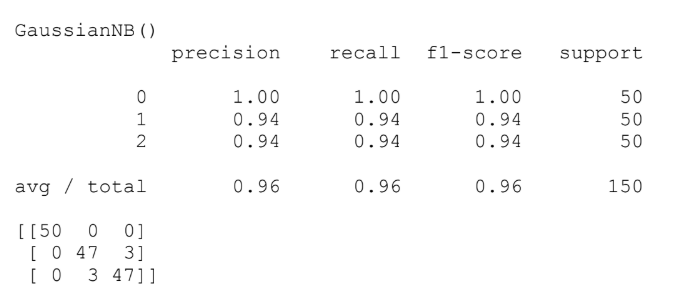


Our Gaussian Naive Bayes implementation is based on the work described in Klein (2021, pp. 316–321), specifically the method outlined on p. 317.

We can compare the output of our implementation to the true example of the representation. As we can see, our reproduced results align perfectly with the benchmark true example above, which confirms the correctness of our implementation. The precision, recall, and F1-scores for each class are consistent. Similarly, the confusion matrix is consistent; this demonstrates the algorithm's effectiveness in distinguishing the three species. Our work achieves 96% accuracy, which validates the Gaussian Naive Bayes model's suitability for this dataset and highlights its computational efficiency in handling continuous features.

**References**

*   GeeksforGeeks, 2023a. Gaussian Naive Bayes. [online] Available at: https://www.geeksforgeeks.org/gaussian-naive-bayes/ [Accessed 4 Dec. 2024].
*   GeeksforGeeks, 2023b. Iris Dataset. [online] Available at: https://www.geeksforgeeks.org/iris-dataset/ [Accessed 4 Dec. 2024].
*   Kashishdafe, 2024. Gaussian Naive Bayes: Understanding the Basics and Applications. [online] Medium. Available at: https://medium.com/@kashishdafe0410/gaussian-naive-bayes-understanding-the-basics-and-applications-52098087b963 [Accessed 4 Dec. 2024].
*   Klein, B., 2021. Machine Learning with Python Tutorial. [PDF] Python-Course.eu. Available at: https://python-course.eu/books/bernd_klein_python_and_machine_learning_a4.pdf [Accessed 9 Dec. 2024].
*   Martins, C., 2023. Gaussian Naive Bayes Explained With Scikit-Learn. [online] Built In. Available at: https://builtin.com/artificial-intelligence/gaussian-naive-bayes [Accessed 4 Dec. 2024].
